In [1]:
import pandas as pd
flights = pd.read_csv("flights.csv",parse_dates=[0, 1])


In [2]:
# 数据总览。展示某出发日期临近10天内的价格查询次数
data_review = pd.DataFrame(columns=['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9'] )

d_day = flights.d_time.dt.date.drop_duplicates().sort_values()  # d_day是航班的日期序列
for d in d_day.values:
    flights_d = flights.loc[flights.d_time.dt.date == d]        # 在日期d出发的航班数据 flights_d
    fetch_date = flights_d.fetch_time.dt.date.drop_duplicates() # 日期d航班的查询日期序列 fetch_date

    # 填充S序列，日期d之前10天内每天爬取次数
    S = pd.Series([0,0,0,0,0,0,0,0,0,0],index = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9'])
    for f in fetch_date.values:
        diff = (d - f).days
        if  diff<= 9:
            flights_d_f =  flights_d.loc[flights_d.fetch_time.dt.date == f] #在日期f查询航班(日期d航班)的数据
            S[diff] = flights_d_f.fetch_time.dt.hour.drop_duplicates().size #在日期f查询日期d航班的查询次数
        else:
            continue
    # 将S添加到数据总览表中
    S.name = d
    data_review = data_review.append(S)

print(data_review) # 9月25日~9月30日数据可用。由于漏采10月1日，10月1日和2日数据基本可用。其他价值不大。

# DataFrame命名遵循的规则：名字与逐渐缩小的范围相对应。考虑一律大写？



           d0 d1 d2 d3 d4 d5 d6 d7 d8 d9
2020-09-22  3  0  0  0  0  0  0  0  0  0
2020-09-23  5  5  0  0  0  0  0  0  0  0
2020-09-24  3  5  5  0  0  0  0  0  0  0
2020-09-25  2  4  5  5  0  0  0  0  0  0
2020-09-26  1  3  4  2  4  0  0  0  0  0
2020-09-27  1  1  3  3  2  4  0  0  0  0
2020-09-28  2  1  1  3  3  2  4  0  0  0
2020-09-29  1  2  1  1  3  3  2  4  0  0
2020-09-30  2  2  2  1  1  3  3  2  4  0
2020-10-01  0  2  2  2  1  1  3  2  2  4
2020-10-02  1  0  2  2  2  1  1  2  2  2
2020-10-03  0  1  0  2  2  1  1  1  2  2
2020-10-04  1  0  1  0  2  2  1  1  1  2
2020-10-05  1  1  0  1  0  2  2  1  1  1
2020-10-06  0  1  1  0  1  0  2  2  1  1
2020-10-07  0  0  1  1  0  1  0  2  2  1
2020-10-08  1  0  0  1  1  0  1  0  2  2
2020-10-09  0  1  0  0  1  1  0  1  0  2
2020-10-10  0  0  1  0  0  1  1  0  1  0
2020-10-11  1  0  0  1  0  0  1  1  0  1
2020-10-12  1  1  0  0  1  0  0  1  1  0
2020-10-13  2  1  1  0  0  1  0  0  1  1
2020-10-14  1  2  1  1  0  0  1  0  0  1
2020-10-15  1  1

In [5]:
#flight_prices，记录目标航班的价格变化情况。同一天有多次价格采集，仅显示最低价。没有价格数据则为NULL
flight_prices = pd.DataFrame(columns=['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9','d_day','flight_number','d_hour','craft_type'])

begin = datetime.date(2020,9,25)
end = datetime.date(2020,10,2)
for i in range((end-begin).days + 1):
    d = begin + datetime.timedelta(days=i) 
    flights_d = flights.loc[flights.d_time.dt.date == d]   # 在日期d出发的航班数据 flights_oneday
    flight_numbers = flights_d.flight_number.drop_duplicates() # 日期d的航班号序列

    for n in flight_numbers.values:
        flights_d_n = flights_d.loc[flights_d.flight_number == n]  # 日期d出发的航班n的数据
        
        #将查询日期相应票价填入序列。如果一天有多次查询则选取最低价
        
        S = pd.Series([0,0,0,0,0,0,0,0,0,0,d,n,flights_d_n.d_time.dt.hour.values[0],flights_d_n.craft_type.values[0]],index = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9','d_day','flight_number','d_hour','craft_type'])
        fetch_date = flights_d_n.fetch_time.dt.date.drop_duplicates() 
        for f in fetch_date.values:
            diff = (d -f).days
            if diff <=9:
                S[diff] = flights_d_n.loc[flights_d_n.fetch_time.dt.date == f].price.min()  #某天f的价格查询序列中的最小值（最低票价）    
            else:
                continue
        
        #将序列加入flight_prices
        flight_prices = flight_prices.append(S,ignore_index=True)

print(flight_prices)


    

       d0    d1    d2    d3    d4    d5    d6    d7    d8    d9       d_day  \
0    2210  2210  2210  2260     0     0     0     0     0     0  2020-09-25   
1    2000  2000  1950  2000     0     0     0     0     0     0  2020-09-25   
2    1690  1690  1690  1690     0     0     0     0     0     0  2020-09-25   
3    2210  2210  2210  2260     0     0     0     0     0     0  2020-09-25   
4    2210  2210  2210  2260     0     0     0     0     0     0  2020-09-25   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...         ...   
100  1690     0  1690  1710  1710  1040  1040   870   870   870  2020-10-02   
101  1950     0  1880  2230  2230  1710  1710  1710  1240  1240  2020-10-02   
102  1210     0  2210  2400  2400  1240  1240  1240  1240  1710  2020-10-02   
103     0     0  1640  1710  1710  1240  1240  1240   870  1240  2020-10-02   
104     0     0  2210  2400  2400  1240  1240  1240  1240  1240  2020-10-02   

    flight_number d_hour craft_type  
0          CZ

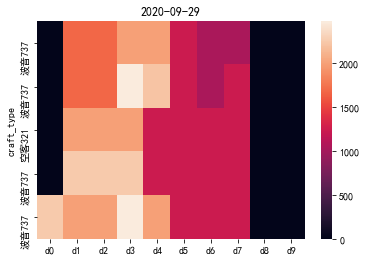

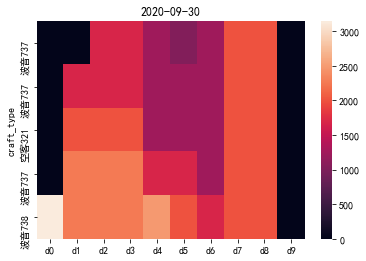

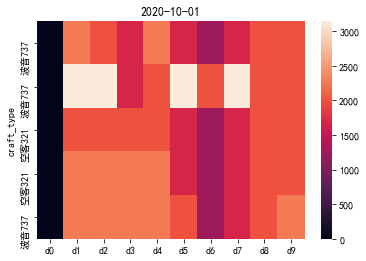

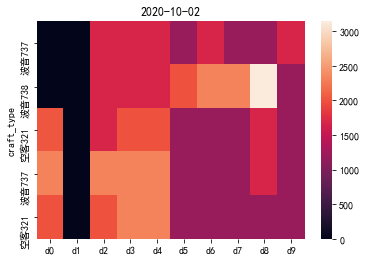

In [7]:
#呈现DataFrame，将flight_number作为index，d0~d9作为columns

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import datetime
begin = datetime.date(2020,9,29)
end = datetime.date(2020,10,2)
for i in range((end-begin).days + 1):
    d = begin + datetime.timedelta(days=i) 

    df = flight_prices.loc[flight_prices.d_day == d]
    df = df.loc[df.flight_number.apply(lambda x: 'CA' in x)]
    df = df.sort_values(by='d_hour',ascending=True)
    df = df.set_index(['craft_type'])
    df = df.drop(labels= ['d_day','d_hour','flight_number'], axis = 1) 

    #print(df)
    import seaborn as sns
    import matplotlib.pyplot as plt
    ax = plt.axes()
    sns.heatmap(df.astype(float),ax=ax)  #heatmap需要df的数据为float类型
    ax.set_title(str(d))
    plt.show()